In [197]:
#fetching the dataset
#500 values in test, 800 in train 
import kaggle
kaggle.api.authenticate()
local_path = './data_set'
if not os.path.isdir('data_set'):
    os.makedirs('data_set')
kaggle.api.dataset_download_files('dansbecker/hot-dog-not-hot-dog', path=local_path, unzip=True)

In [217]:
import cv2
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
%matplotlib inline
def print_img(x):
    '''
    prints the image of a given digit
    '''
    x = x.reshape(360,360)
    plt.imshow(x, cmap = cm.binary, interpolation="nearest")
    plt.axis("off")
    
    plt.show()

In [210]:
from sys import stdout
def sweep_dir(folder, recursive=True):
    '''
    sweep a given folder for all images, process and load them into a np dataset which gets returned
    '''
    dataset = None
    for file in os.listdir(folder):
        if file.endswith(".jpg"):
            print("loading file: "+folder+file, end='\r')
            stdout.flush()
            img = 1-cv2.imread(folder+file, 0) #loading in the image in black and white
            img = cv2.resize(img,(360, 360))           #reshaping to be 360 by 360 pixles
            img = img.reshape(-1)                      #reshaping to 1 dimension
            if dataset is None:
                dataset = img
            else:
                dataset = np.vstack((dataset, img))
        elif os.path.isdir(folder+file) and recursive is True: #if this is a directory
            rec_set = sweep_dir(folder+file+'/')
            if dataset is None:
                dataset = rec_set
            else:
                dataset = np.vstack((dataset, rec_set))
    print("                                                                                             ", end='\r')
    return dataset
X_train, X_test = sweep_dir(local_path+'/train/'), sweep_dir(local_path+'/test/')
print(X_train.shape, X_test.shape)

(798, 129600) (500, 129600)                                                                  


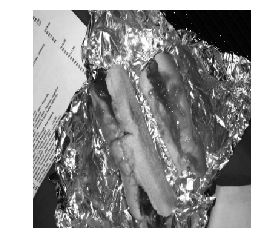

True


In [221]:
y_train, y_test = np.zeros((X_train.shape[0]), dtype=bool), np.zeros((X_test.shape[0]), dtype=bool)

y_train[399:] = True
y_test[250:] = True

In [224]:
#shuffling the data
shuffle_perm = np.random.permutation((X_train.shape[0]))
X_train, y_train = X_train[shuffle_perm], y_train[shuffle_perm]

In [226]:
from sklearn.linear_model import SGDClassifier as sgdc
hot_not_hot = sgdc(random_state=42)
hot_not_hot.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

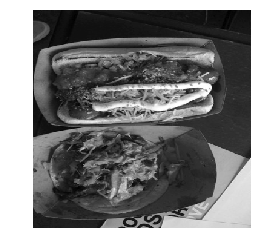

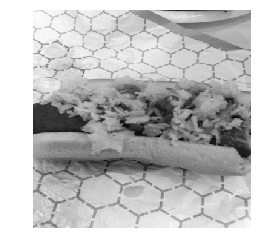

array([ True,  True])

In [232]:
#a random_image
rand_val = np.random.randint(low=0,high=X_train.shape[0])
val_1 = X_train[rand_val]
print_img(val_1)

#a random second image
rand_val = np.random.randint(low=0,high=X_train.shape[0])
val_2 = X_train[rand_val]
print_img(val_2)

hot_not_hot.predict([val_1, val_2])